# Importing Libraries

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Reading CSV File

In [10]:
df =pd.read_csv(r"C:\Users\dell\Downloads\Walmart_customer_purchases.csv")
df


,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,80853da9-ef96-4c83-9191-bc872c3968a9,48,Male,Barbaramouth,Electronics,Laptop,2024-11-18,391.48,Debit Card,No,5,No
49996,97df1ed3-4041-474c-8ce8-958c816fc30a,51,Female,Troyshire,Beauty,Perfume,2024-11-19,272.09,Cash on Delivery,Yes,1,No
49997,948efe87-82a3-4a38-9dd6-30d44ad6f879,51,Male,South Rachel,Home,Curtains,2024-02-11,280.81,Debit Card,Yes,2,No
49998,9804d52f-35cd-4af3-a9e3-cbb8367396f0,33,Other,Courtneyville,Beauty,Shampoo,2024-08-31,140.74,Debit Card,No,2,No


In [250]:
df.shape

(50000, 12)

In [251]:
df.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


In [252]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'City', 'Category', 'Product_Name',
       'Purchase_Date', 'Purchase_Amount', 'Payment_Method',
       'Discount_Applied', 'Rating', 'Repeat_Customer'],
      dtype='object')

In [253]:
df.describe()

,Age,Purchase_Amount,Rating
count,50000.000000,50000.000000,50000.000000
mean,38.945220,255.532230,2.998680
std,12.398137,141.574416,1.417956
min,18.000000,10.010000,1.000000
25%,28.000000,133.050000,2.000000
50%,39.000000,255.045000,3.000000
75%,50.000000,378.912500,4.000000
max,60.000000,499.990000,5.000000


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50000 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   City              50000 non-null  object 
 4   Category          50000 non-null  object 
 5   Product_Name      50000 non-null  object 
 6   Purchase_Date     50000 non-null  object 
 7   Purchase_Amount   50000 non-null  float64
 8   Payment_Method    50000 non-null  object 
 9   Discount_Applied  50000 non-null  object 
 10  Rating            50000 non-null  int64  
 11  Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB


# Checking for Null values


In [256]:
#checking for null values
df.isnull().sum()

Customer_ID         0
Age                 0
Gender              0
City                0
Category            0
Product_Name        0
Purchase_Date       0
Purchase_Amount     0
Payment_Method      0
Discount_Applied    0
Rating              0
Repeat_Customer     0
dtype: int64

# Changing data type of purchase amount ,converting it from float to int.


In [258]:
#changing data type of purchase amount ,converting it from float to int.
df['Purchase_Amount'] = df['Purchase_Amount'].astype('int')
df['Purchase_Amount'].dtypes

dtype('int32')

# Converting 'Purchase_Date' to datetime


In [260]:
# Convert 'Purchase_Date' to datetime..............
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
print(df['Purchase_Date'].dtypes)

datetime64[ns]


In [261]:
df['Purchase_Date'] = df['Purchase_Date'].dt.year
df['Purchase_Date'].dtypes

dtype('int32')

In [262]:
df.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024,253,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024,73,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024,125,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024,450,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024,369,Credit Card,Yes,2,Yes


# Dropping the column

In [264]:
cols=['Customer_ID']
df.drop(cols, axis = 1, inplace =True)
df.columns

Index(['Age', 'Gender', 'City', 'Category', 'Product_Name', 'Purchase_Date',
       'Purchase_Amount', 'Payment_Method', 'Discount_Applied', 'Rating',
       'Repeat_Customer'],
      dtype='object')

# Chi square test

In [266]:
import numpy as np
import scipy.stats as stats

# Corrected categorical data
x_Gender = ['Male', 'Female', 'Other', 'Male', 'Female']
y_Category = ['Electronics', 'Clothing', 'Beauty', 'Clothing', 'Electronics']

# Create a contingency table using pandas
import pandas as pd

data = pd.DataFrame({'Gender': x_Gender, 'Category': y_Category})
contingency_table = pd.crosstab(data['Gender'], data['Category'])

# Apply Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print(f"\nChi-Square Value: {chi2:.2f}")
print(f"p-value: {p:.3f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

Contingency Table:
Category  Beauty  Clothing  Electronics
Gender                                 
Female         0         1            1
Male           0         1            1
Other          1         0            0

Chi-Square Value: 5.00
p-value: 0.287
Degrees of Freedom: 4

Expected Frequencies:
[[0.4 0.8 0.8]
 [0.4 0.8 0.8]
 [0.2 0.4 0.4]]


# Exploratory Data Analysis..............................................

In [268]:
# GENDER ( Number of repeated customers according to gender# GENDER ( Number of repeated customers according to gender

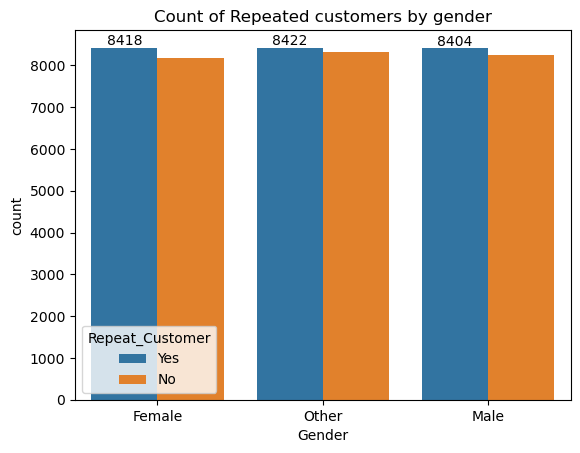

In [269]:
# plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Gender" , data = df , hue = "Repeat_Customer")
ax.bar_label(ax.containers[0])
plt.title("Count of Repeated customers by gender")
plt.show()

 # First ,we have done grouping of Repeat_customer and then Showing the Repeated Customers in  Percentage using Pie chart..

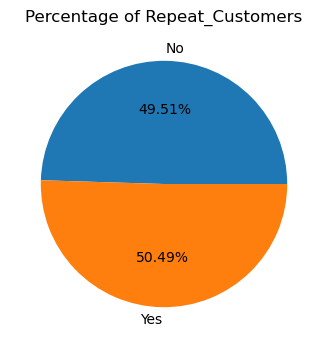

In [271]:
plt.figure(figsize = (4,4))
gb = df.groupby("Repeat_Customer").agg({'Repeat_Customer': "count"})
plt.pie(gb['Repeat_Customer'] ,labels = gb.index , autopct = "%1.2f%%")
plt.title("Percentage of Repeat_Customers")
plt.show()

# Correlation Analysis

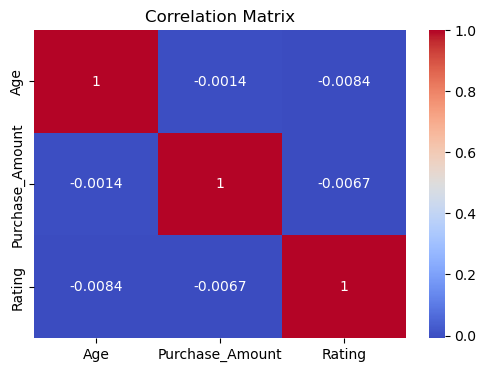

In [273]:
# Correlation matrix using heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Age', 'Purchase_Amount', 'Rating']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Feature Engineering

# Univariate Analysis

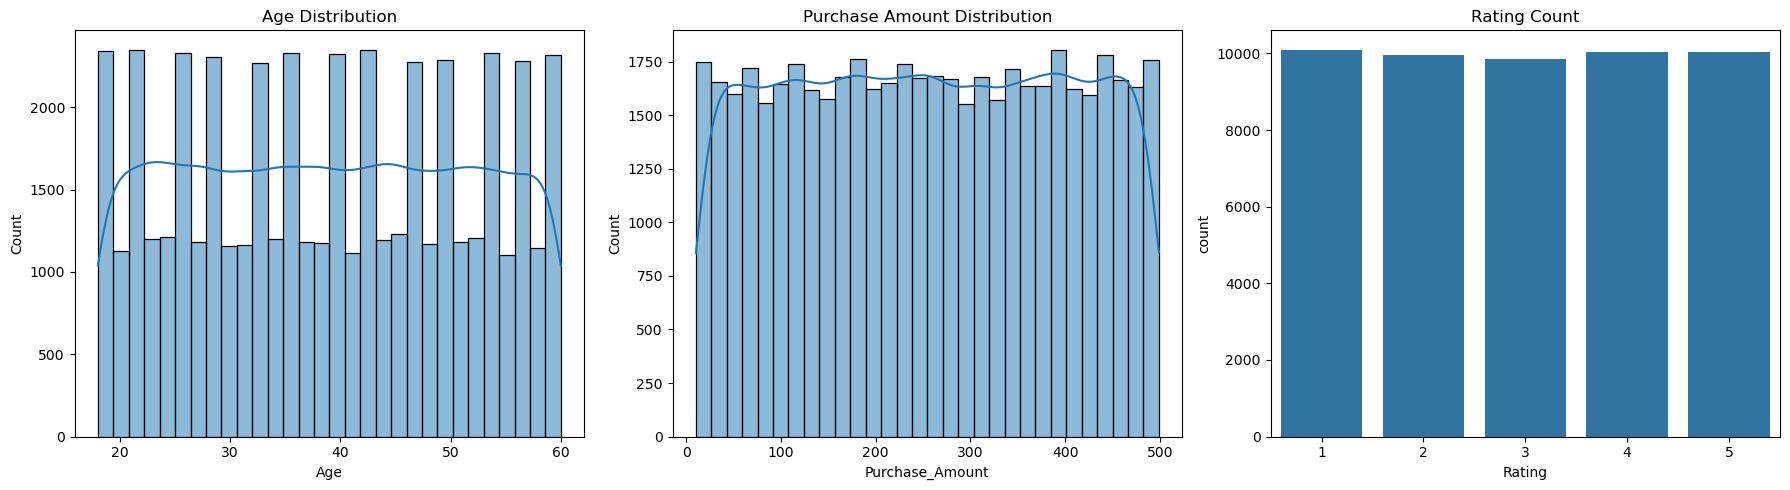

In [276]:
# Plot for numeric variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0])
sns.histplot(df['Purchase_Amount'], bins=30, kde=True, ax=axes[1])
sns.countplot(x='Rating', data=df, ax=axes[2])
axes[0].set_title("Age Distribution")
axes[1].set_title("Purchase Amount Distribution")
axes[2].set_title("Rating Count")
plt.tight_layout()
plt.show()

# Categorical Distribution

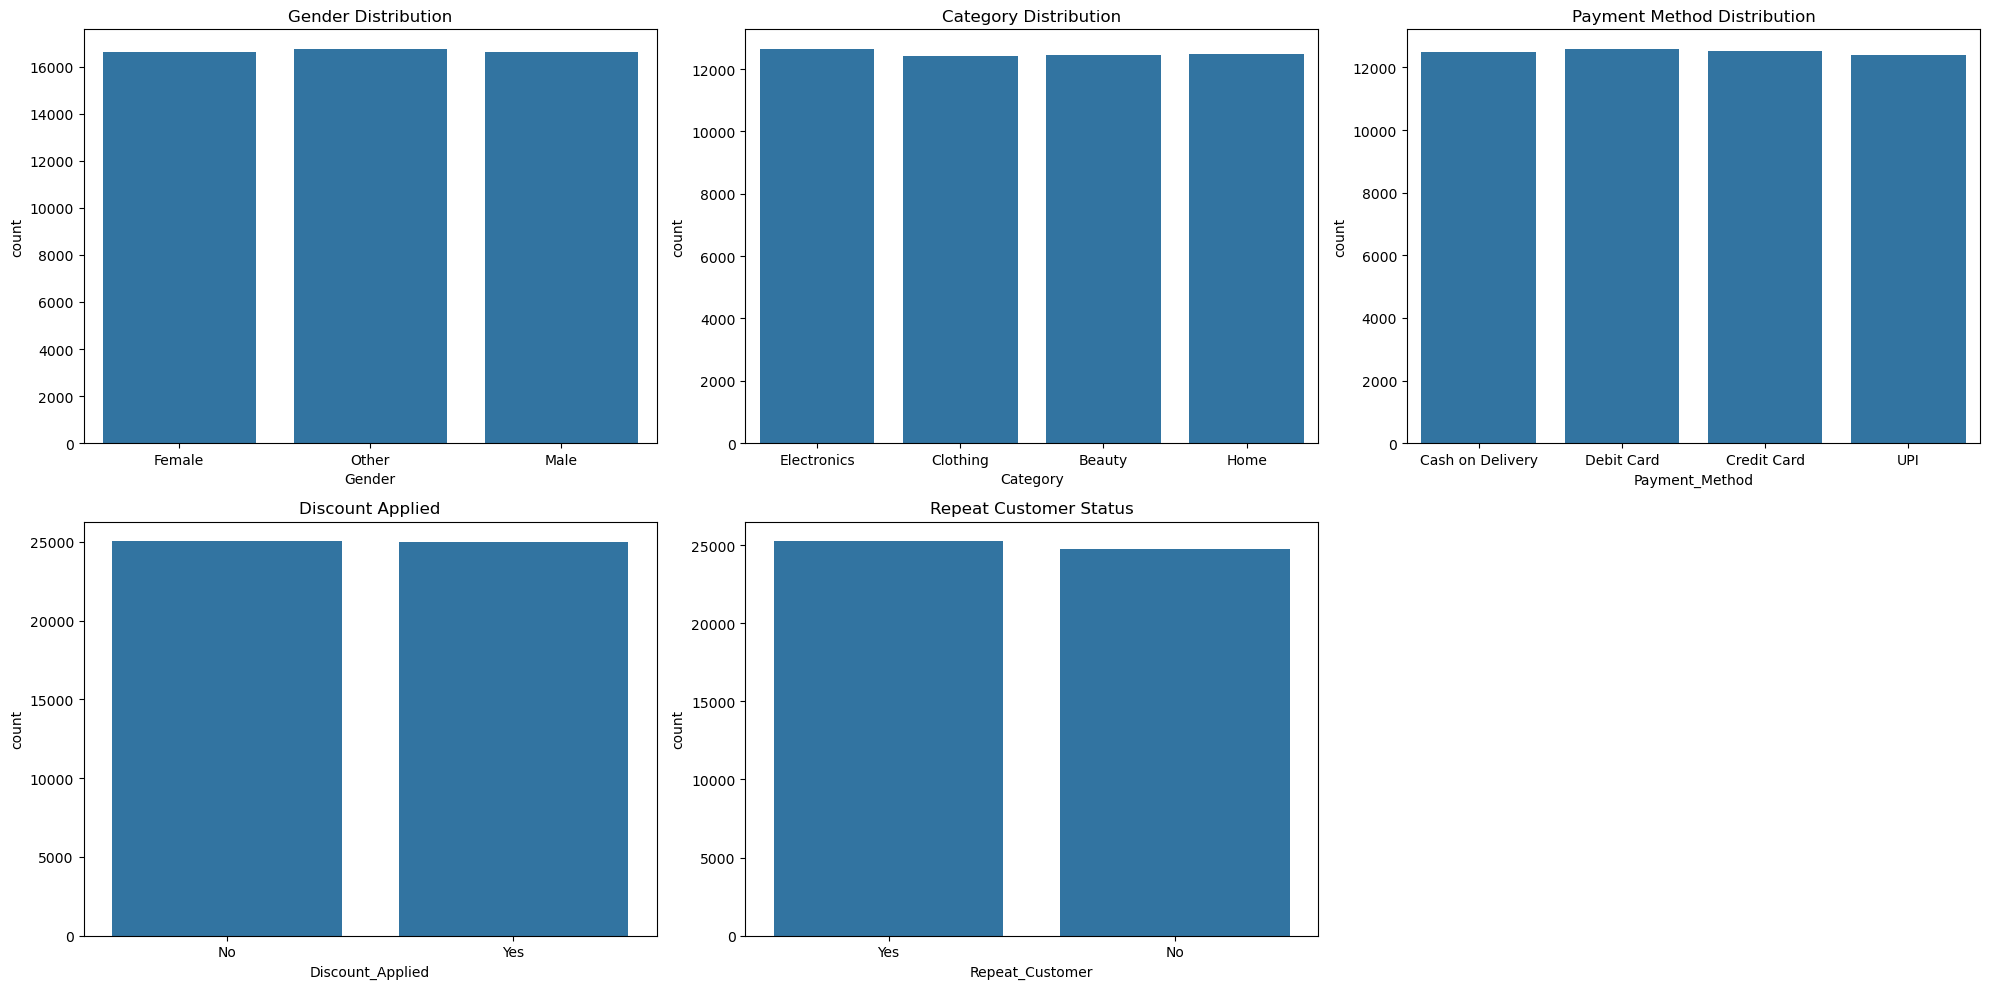

In [278]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.countplot(x='Gender', data=df, ax=axes[0, 0])
sns.countplot(x='Category', data=df, ax=axes[0, 1])
sns.countplot(x='Payment_Method', data=df, ax=axes[0, 2])
sns.countplot(x='Discount_Applied', data=df, ax=axes[1, 0])
sns.countplot(x='Repeat_Customer', data=df, ax=axes[1, 1])

axes[0, 0].set_title("Gender Distribution")
axes[0, 1].set_title("Category Distribution")
axes[0, 2].set_title("Payment Method Distribution")
axes[1, 0].set_title("Discount Applied")
axes[1, 1].set_title("Repeat Customer Status")

axes[1, 2].axis('off')  # remove unused subplot
plt.tight_layout()
plt.show()

 # Bivariate Analysis

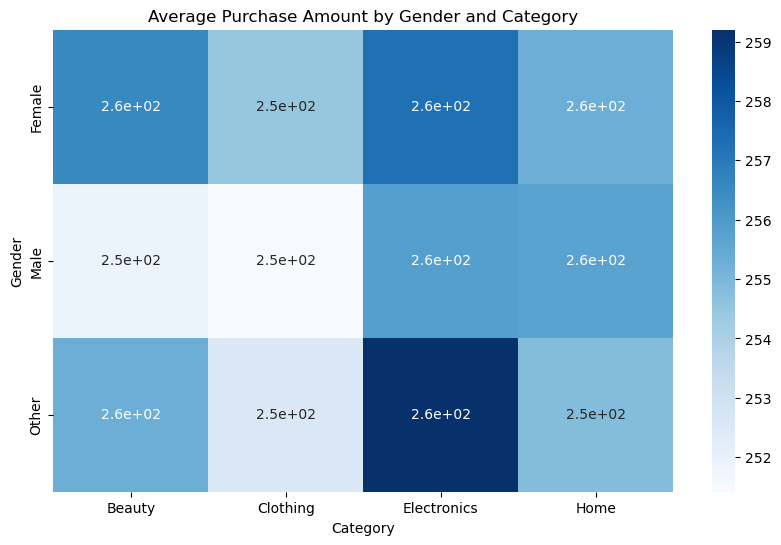

In [280]:
 #Step 7 Bivariate Analysis
pivot = df.pivot_table(values='Purchase_Amount', index='Gender', columns='Category', aggfunc='mean')

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='Blues')
plt.title("Average Purchase Amount by Gender and Category")
plt.show()

# Time Series Analysis


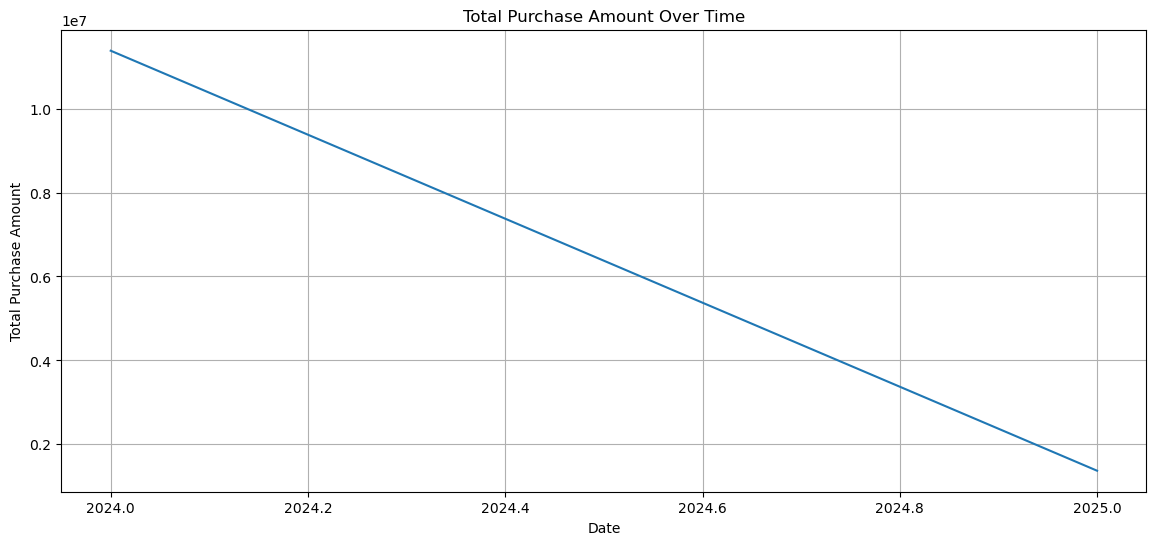

In [282]:
#Purchases over time
daily_sales = df.groupby("Purchase_Date")["Purchase_Amount"].sum()

plt.figure(figsize=(14, 6))
daily_sales.plot()
plt.title("Total Purchase Amount Over Time")
plt.xlabel("Date")
plt.ylabel("Total Purchase Amount")
plt.grid(True)
plt.show()


# Predictive Modelling 

In [284]:
# Drop irrelevant columns
df.drop(columns=['Purchase_Date', 'Product_Name', 'City'], inplace=True)

# Map target to binary
df['Repeat_Customer'] = df['Repeat_Customer'].map({'Yes': 1, 'No': 0})

# Encode categorical columns
categorical_cols = ['Gender', 'Category', 'Payment_Method', 'Discount_Applied']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [285]:
#Handle Class Imbalance (Optional — Random Oversampling)
# Separate majority and minority classes
df_majority = df[df.Repeat_Customer == 1]
df_minority = df[df.Repeat_Customer == 0]

# Upsample minority
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=len(df_majority),    
                                 random_state=42)  

# Combine and shuffle
df_balanced = pd.concat([df_majority, df_minority_upsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Train/Test Split 

In [287]:
# Split features and target
X = df_balanced.drop('Repeat_Customer', axis=1)
y = df_balanced['Repeat_Customer']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [289]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

 # Evaluating Models and Predicting 

In [291]:
 #Evaluate Models
 # Predict
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Reports
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print()

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.49      0.58      0.53      4998
           1       0.50      0.42      0.45      5100

    accuracy                           0.49     10098
   macro avg       0.50      0.50      0.49     10098
weighted avg       0.50      0.49      0.49     10098

Accuracy: 0.4947514359279065

Random Forest Report:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68      4998
           1       0.69      0.62      0.65      5100

    accuracy                           0.67     10098
   macro avg       0.67      0.67      0.66     10098
weighted avg       0.67      0.67      0.66     10098

Accuracy: 0.6653792830263419


 # Confusion Matrix


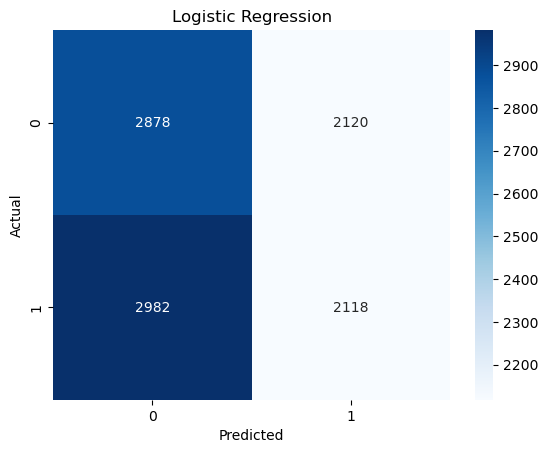

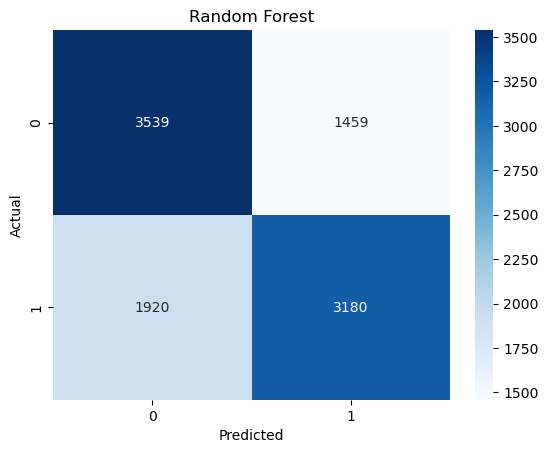

In [293]:
#Optional: Confusion Matrix Plot
# Confusion Matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_conf_matrix(y_test, y_pred_log, "Logistic Regression")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")